<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/EX%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   8192/Unknown - 0s 0us/stepDataset extracted at /root/.keras/datasets/household_power_consumption.txt
df_power: (2075259, 7)
                       Total  Percent
Global_active_power        0      0.0
Global_reactive_power      0      0.0
Voltage                    0      0.0
Global_intensity           0      0.0
Sub_metering_1             0      0.0
Sub_metering_2             0      0.0
Sub_metering_3             0      0.0
df_power: (34589, 7)
df_train: (24212, 7)
df_val: (6918, 7)
df_test: (3459, 7)
y_pred_naive: (1, 7)
Naïve predictor MSE: 1.34310
x_train: (24202, 10, 7), y_train: (24202, 1, 7)
x_val: (6908, 10, 7), y_val: (6908, 1, 7)
x_test: (3449, 10, 7), y_test: (3449, 1, 7)


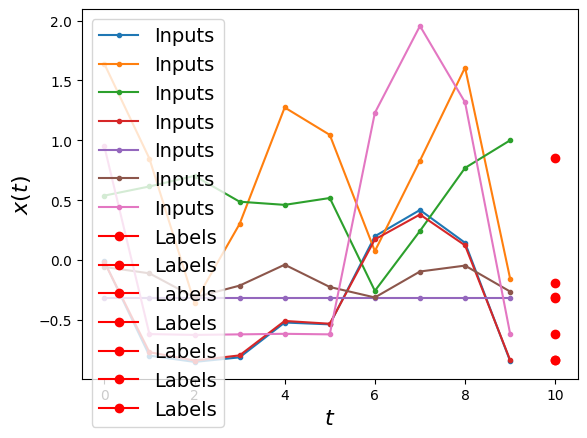

y_pred_naive: (1, 7)
Naïve predictor MSE: 1.34310
Epoch 1/10
757/757 [==============================] - 3s 2ms/step - loss: 0.5997 - val_loss: 0.5713
Epoch 2/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5787 - val_loss: 0.5730
Epoch 3/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5719 - val_loss: 0.5602
Epoch 4/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5648 - val_loss: 0.5638
Epoch 5/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5588 - val_loss: 0.5504
Epoch 6/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5559 - val_loss: 0.5462
Epoch 7/10
757/757 [==============================] - 2s 3ms/step - loss: 0.5521 - val_loss: 0.5461
Epoch 8/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5501 - val_loss: 0.5616
Epoch 9/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5490 - val_loss: 0.5424
Epoch 10/10
216/216 [=============================

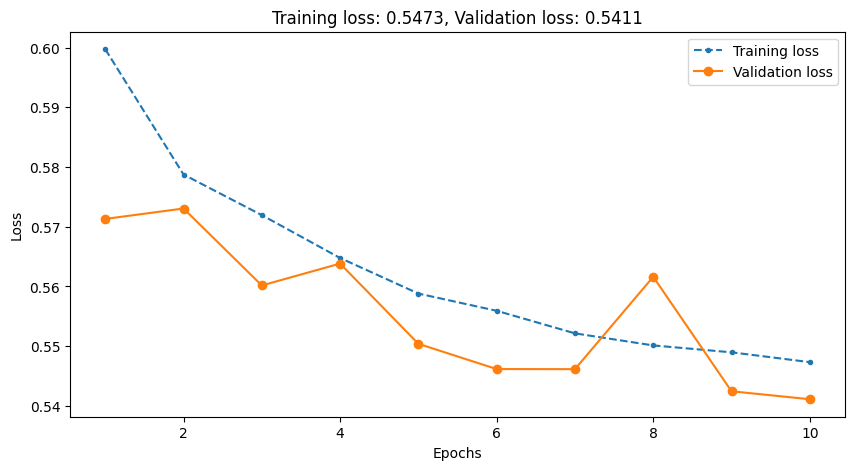

In [1]:
# GURRAM VAMSI - 9921005149


import platform
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda, Reshape


def plot_series(series, y_true, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    """Plot a time series with actual and predicted future values"""
    plt.plot(series, ".-", label="Inputs")
    n_steps = series.shape[0]


    # Calculate the number of steps ahead (= number of future values)
    n_steps_ahead = 1
    if not np.isscalar(y_true):
        n_steps_ahead = y_true.shape[0]


    plt.plot(np.arange(n_steps, n_steps + n_steps_ahead), y_true, "ro-", label="Labels")


    if y_pred is not None:
        plt.plot(np.arange(n_steps, n_steps + n_steps_ahead), y_pred, "bx-", label="Predicted", markersize=10)


    if x_label:
        plt.xlabel(x_label, fontsize=16)


    if y_label:
        plt.ylabel(y_label, fontsize=16)


    plt.legend(fontsize=14)


def plot_loss(history):
    """Plot training loss for a Keras model"""
    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)


    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)


    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)


    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()


# Step 1: loading the data
zip_path = get_file(
    origin="https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip",
    fname="household_power_consumption.zip",
    extract=True,
)
file_path, _ = os.path.splitext(zip_path)
file_path += ".txt"
print(f"Dataset extracted at {file_path}")


df_power = pd.read_csv(
    file_path,
    sep=";",
    parse_dates={"Date_time": ["Date", "Time"]},
    infer_datetime_format=True,
    low_memory=False,
    na_values=["?"],
    index_col="Date_time",
)
print(f"df_power: {df_power.shape}")


# Step 2: exploring the data
# (Your code for exploring the data can go here)


# Step 3: preparing the data
def find_missing_values(df):
    total_missing = df.isnull().sum()
    percent_missing = (total_missing * 100 / df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])


def fill_na(df):
    n_features = df.shape[1]
    for j in range(0, n_features):
        df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())
    return df


df_power = fill_na(df_power)
print(find_missing_values(df_power).head(n=10))


df_power = df_power.resample("h").mean()
print(f"df_power: {df_power.shape}")


# (Your code for plotting features can go here)


# Question: Split the dataset using (70%, 20%, 10%) ratios.
n_samples = len(df_power)


df_train = df_power[:int(0.7 * n_samples)]
df_val = df_power[int(0.7 * n_samples):int(0.9 * n_samples)]
df_test = df_power[int(0.9 * n_samples):]


print(f"df_train: {df_train.shape}")
print(f"df_val: {df_val.shape}")
print(f"df_test: {df_test.shape}")


# GURRAM VAMSI - 9921005149


# Question: Standardize the splitted sets.
train_mean = df_train.mean()
train_std = df_train.std()


df_train_std = (df_train - train_mean) / train_std
df_val_std = (df_val - train_mean) / train_std
df_test_std = (df_test - train_mean) / train_std


def split_into_windows(data, n_steps_before, n_steps_ahead):
    x, y = [], []
    for i in range(len(data) - n_steps_before - n_steps_ahead + 1):
        x_window = data[i:i + n_steps_before]
        y_window = data[i + n_steps_before:i + n_steps_before + n_steps_ahead]
        x.append(x_window)
        y.append(y_window)
    return np.array(x), np.array(y)


n_steps_ahead = 1
n_steps_before = 10
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)


# Naïve forecasting
y_pred_naive = np.tile(df_val_std.values[-1:, :], (n_steps_ahead, 1))
print(f"y_pred_naive: {y_pred_naive.shape}")
print(f"Naïve predictor MSE: {np.mean(mean_squared_error(y_val, y_pred_naive)):0.05f}")


# (Your code for plotting Naïve forecasting can go here)


# Dense network
dense_model = Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(units=512, activation="relu"),
    Dense(units=n_steps_ahead * df_train_std.shape[1], kernel_initializer=tf.initializers.zeros()),
    Reshape([n_steps_ahead, df_train_std.shape[1]])
])


def train(model, x_train, y_train, x_val, y_val):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_val, y_val))
    return history


x_train, y_train = split_into_windows(df_train_std.values, n_steps_before, n_steps_ahead)
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)
x_test, y_test = split_into_windows(df_test_std.values, n_steps_before, n_steps_ahead)


print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")


def plot_features(series, labels, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-", label="Inputs")
    n_steps = series.shape[0]


    plt.plot(np.arange(n_steps, n_steps + len(labels)), labels, "ro-", label="Labels")


    if x_label:
        plt.xlabel(x_label, fontsize=16)


    if y_label:
        plt.ylabel(y_label, fontsize=16)


    plt.legend(fontsize=14)
    plt.show()


# Now you can use plot_features
plot_features(x_val[-1], y_val[-1])



n_steps_ahead = 1
n_steps_before = 10
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)


# Naïve forecasting
y_pred_naive = np.tile(df_val_std.values[-1:, :], (n_steps_ahead, 1))
print(f"y_pred_naive: {y_pred_naive.shape}")
print(f"Naïve predictor MSE: {np.mean(mean_squared_error(y_val, y_pred_naive)):0.05f}")


# Dense network
dense_model = Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(units=512, activation="relu"),
    Dense(units=n_steps_ahead * df_train_std.shape[1], kernel_initializer=tf.initializers.zeros()),
    Reshape([n_steps_ahead, df_train_std.shape[1]])
])
n_epochs = 10
history = train(dense_model, x_train, y_train, x_val, y_val)
plot_loss(history)
y_pred_dense = dense_model.predict(x_val)
print(f"Dense network MSE: {np.mean(mean_squared_error(y_val, y_pred_dense)):0.05f}")


# GURRAM VAMSI 9921005149